## 预处理数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 取数据

In [2]:
dataDM = pd.read_table('./Topic-paper-author/Data Mining.txt',names=['Conference/Journal','Title','Authors','Year','Abstract'])
dataDb = pd.read_table('./Topic-paper-author/Database.txt',names=['Conference/Journal','Title','Authors','Year','Abstract'])
dataM = pd.read_table('./Topic-paper-author/Medical Informatics.txt',names=['Conference/Journal','Title','Authors','Year','Abstract'])
dataT = pd.read_table('./Topic-paper-author/Theory.txt',names=['Conference/Journal','Title','Authors','Year','Abstract'])
dataV = pd.read_table('./Topic-paper-author/Visualization.txt',names=['Conference/Journal','Title','Authors','Year','Abstract'])

In [3]:
dataDM.tail()

,Conference/Journal,Title,Authors,Year,Abstract
2265,SDM,WFIM: Weighted Frequent Itemset Mining with a ...,"Unil Yun,John J. Leggett",2005,WFIM: Weighted Frequent Itemset Mining with a ...
2266,SDM,Cross Table Cubing: Mining Iceberg Cubes from ...,"Jian Pei,Moonjung Cho,David Wai-Lok Cheung",2005,Cross Table Cubing: Mining Iceberg Cubes from ...
2267,SDM,Correcting Sampling Bias in Structural Genomic...,"Kang Peng,Slobodan Vucetic,Zoran Obradovic",2005,Correcting Sampling Bias in Structural Genomic...
2268,SDM,Parallel Computation of RBF Kernels for Suppor...,"Shibin Qiu,Terran Lane",2005,Parallel Computation of RBF Kernels for Suppor...
2269,SDM,Topic-driven Clustering for Document Datasets.,"Ying Zhao,George Karypis",2005,Topic-driven Clustering for Document Datasets.


In [4]:
print('the documents of Data Mining:',len(dataDM),'\nthe documents of Database:',len(dataDb),
      '\nthe documents of Medical Informatics:',len(dataM),'\nthe documents of Theory:',len(dataT),
      '\nthe documents of Visualization:',len(dataV))

the documents of Data Mining: 2270 
the documents of Database: 5059 
the documents of Medical Informatics: 3066 
the documents of Theory: 3995 
the documents of Visualization: 4074


### 连接数据

In [5]:
dataDM['Tag'] = 'Data Mining'
dataDb['Tag'] = 'Database'
dataM['Tag'] = 'Medical Informatics'
dataT['Tag'] = 'Theory'
dataV['Tag'] = 'Visualization'
dataset = pd.concat([dataDM,dataDb,dataM,dataT,dataV],ignore_index=True)

In [6]:
dataset.head()

,Conference/Journal,Title,Authors,Year,Abstract,Tag
0,KDD,Knowledge Discovery in Databases: Papers from ...,"Usama M. Fayyad,Ramasamy Uthurusamy",1994,Knowledge Discovery in Databases: Papers from ...,Data Mining
1,KDD,STAR: A General Architecture for the Support o...,"Paul Anderson,Ray Smith,Zhongwei Zhang",1995,STAR: A General Architecture for the Support o...,Data Mining
2,KDD,Learning First Order Logic Rules with a Geneti...,"Sébastien Augier,Gilles Venturini,Yves Kodratoff",1995,Learning First Order Logic Rules with a Geneti...,Data Mining
3,KDD,Discovery and Maintenance of Functional Depend...,Siegfried Bell,1995,Discovery and Maintenance of Functional Depend...,Data Mining
4,KDD,Active Data Mining.,"Rakesh Agrawal,Giuseppe Psaila",1995,Active Data Mining.,Data Mining


In [7]:
dataset['Tag'].value_counts()

Database               5059
Visualization          4074
Theory                 3995
Medical Informatics    3066
Data Mining            2270
Name: Tag, dtype: int64

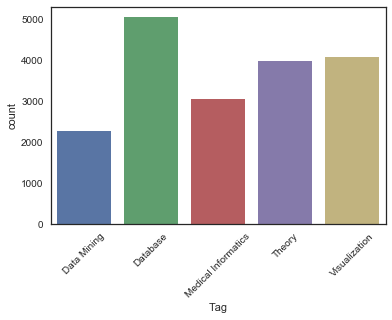

In [8]:
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')
g = sns.countplot(x='Tag', data=dataset)
g = plt.setp(g.get_xticklabels(), rotation=45) 
plt.show()

## 保存至文件

In [15]:
dataset.to_csv('data/TPA1.csv')

## 继续处理数据

In [16]:
# dataset2=dataset.sample(n=1000) # 随机选取1000个样本
dataset2 = dataset
dataset2 = dataset2.drop(['Conference/Journal', 'Authors','Year'], axis=1) # 只留下Title和Tag两列

In [17]:
dataset2['Tag'].value_counts()

Database               5059
Visualization          4074
Theory                 3995
Medical Informatics    3066
Data Mining            2270
Name: Tag, dtype: int64

In [18]:
dataset2 = dataset2.replace({'Tag':'Data Mining'},1)
dataset2 = dataset2.replace({'Tag':'Database'},2)
dataset2 = dataset2.replace({'Tag':'Medical Informatics'},3)
dataset2 = dataset2.replace({'Tag':'Theory'},4)
dataset2 = dataset2.replace({'Tag':'Visualization'},5)
dataset2['Tag'].value_counts()

2    5059
5    4074
4    3995
3    3066
1    2270
Name: Tag, dtype: int64

In [19]:
dataset2.tail()

,Title,Abstract,Tag
18459,Registration Based on Projective Reconstructio...,"In AR systems, registration is one of the most...",5
18460,Blind Robust Watermarking Schemes for Copyrigh...,"In this paper, two novel methods suitable for ...",5
18461,Topological Lines in 3D Tensor Fields and Disc...,This paper addresses several issues related to...,5
18462,Decorating Surfaces with Bidirectional Texture...,We present a system for decorating arbitrary s...,5
18463,Comparison of Path Visualizations and Cognitiv...,We describe a between-subjects experiment that...,5


## 保存至文件

In [20]:
dataset2.to_csv('data/TPA2.csv')